In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from textblob import TextBlob


In [ ]:
apps = pd.read_csv('/content/apps.csv')
reviews = pd.read_csv('/content/user_reviews.csv')


In [ ]:
apps = apps.drop_duplicates()
apps = apps.dropna(subset=['Rating']).reset_index(drop=True)

apps.loc[:, 'Price'] = apps['Price'].astype(str).str.replace('$','').astype(float)

apps.loc[:, 'Installs'] = apps['Installs'].astype(str).str.replace('[+,]', '', regex=True).astype(int)
apps.loc[:, 'Size'] = apps['Size'].fillna(apps['Size'].median())

apps.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8196 entries, 0 to 8195
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      8196 non-null   int64  
 1   App             8196 non-null   object 
 2   Category        8196 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         8196 non-null   int64  
 5   Size            8196 non-null   float64
 6   Installs        8196 non-null   int64  
 7   Type            8196 non-null   object 
 8   Price           8196 non-null   float64
 9   Content Rating  8196 non-null   object 
 10  Genres          8196 non-null   object 
 11  Last Updated    8196 non-null   object 
 12  Current Ver     8192 non-null   object 
 13  Android Ver     8194 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 896.6+ KB


In [ ]:
reviews.info()
reviews.isnull().sum()

reviews = reviews.dropna(subset=['Translated_Review'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


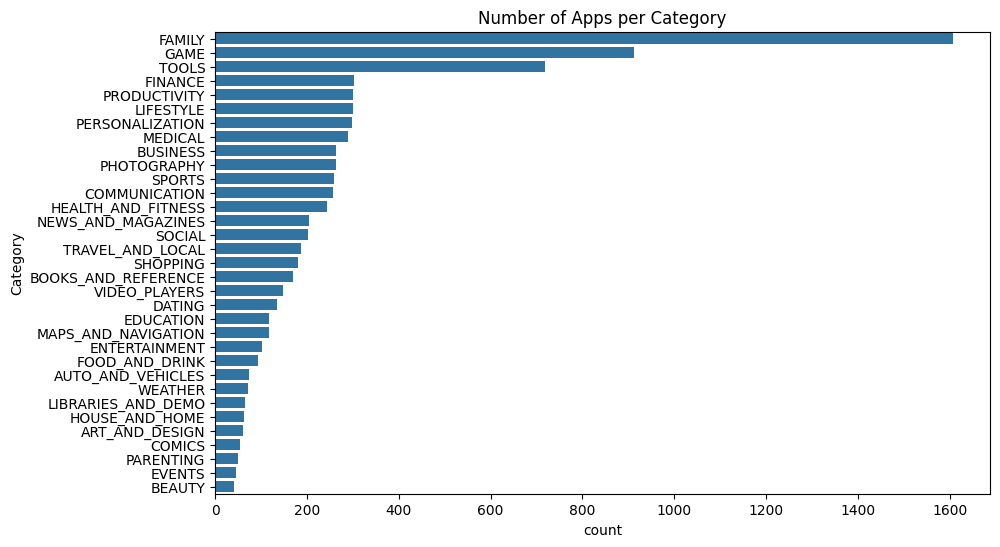

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y='Category', data=apps, order=apps['Category'].value_counts().index)
plt.title('Number of Apps per Category')
plt.show()


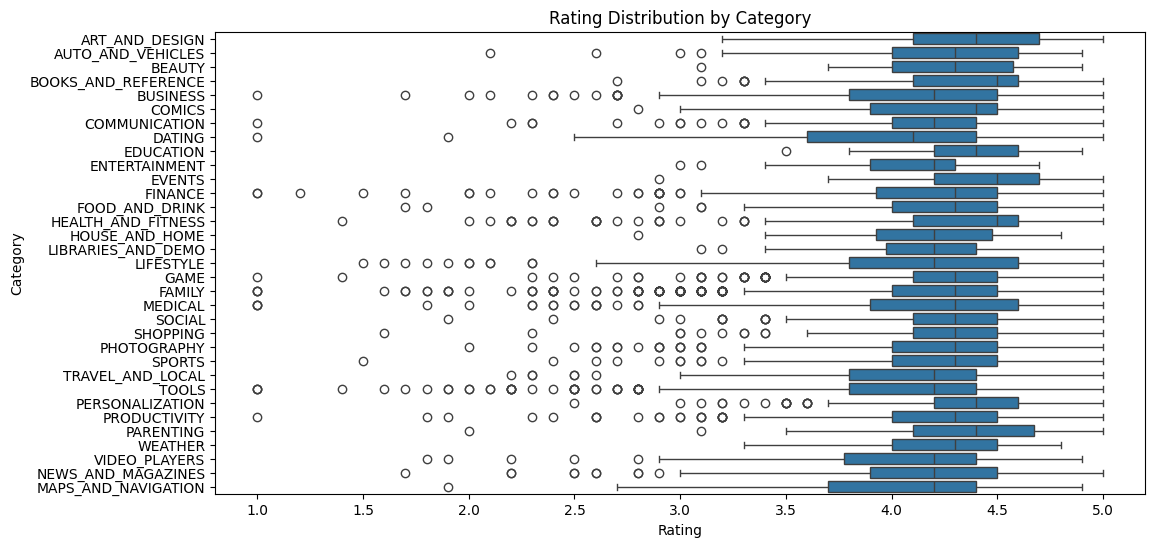

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Rating', y='Category', data=apps, orient='h')
plt.title('Rating Distribution by Category')
plt.show()


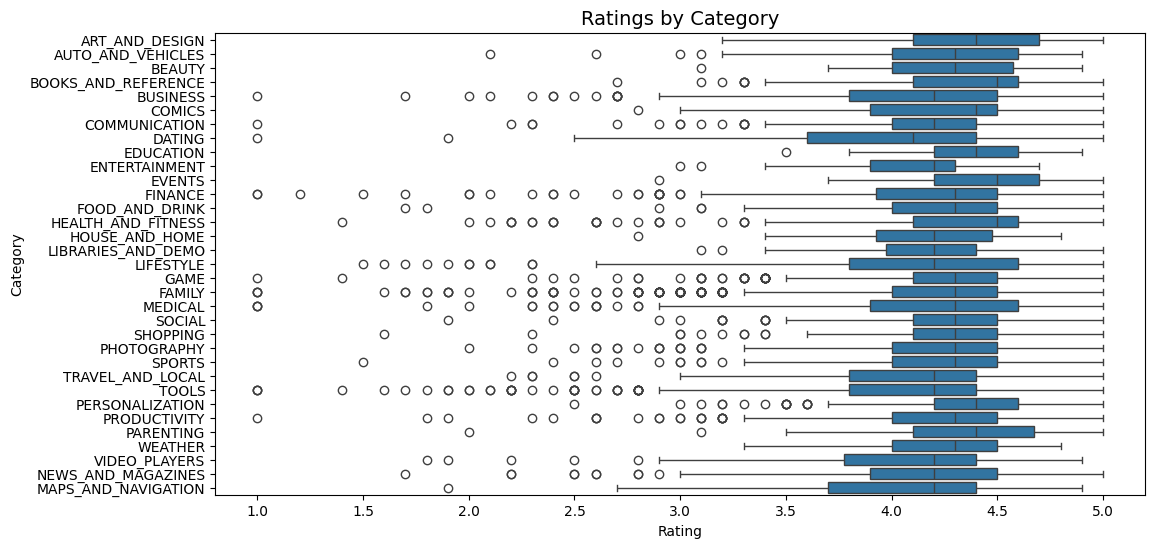

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Rating', y='Category', data=apps, orient='h')
plt.title('Ratings by Category', fontsize=14)
plt.show()


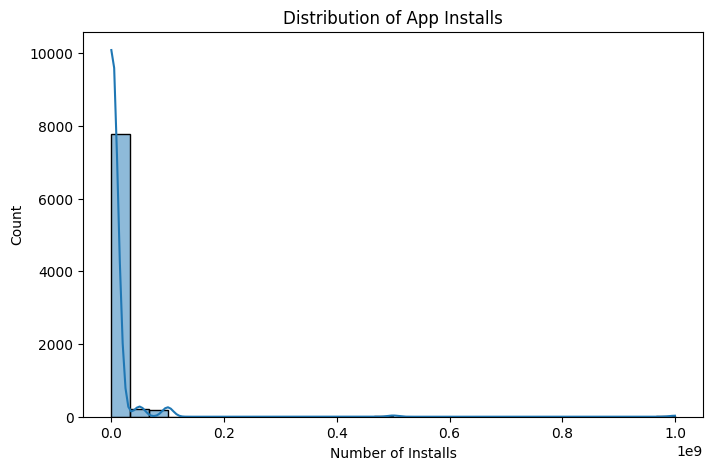

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(apps['Installs'], bins=30, kde=True)
plt.title('Distribution of App Installs')
plt.xlabel('Number of Installs')
plt.show()


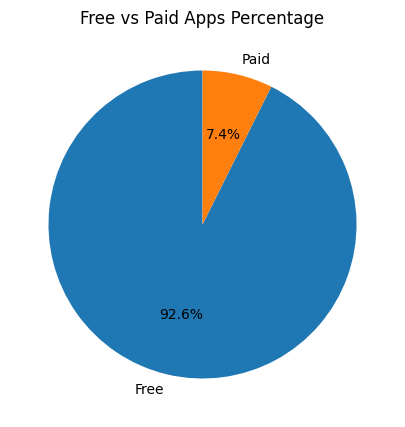

In [ ]:
plt.figure(figsize=(8,5))
apps['Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Free vs Paid Apps Percentage')
plt.ylabel('')
plt.show()


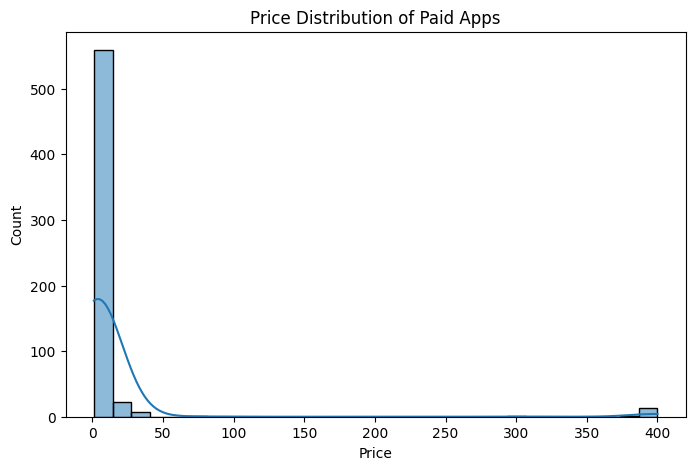

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(apps[apps['Type']=='Paid']['Price'], bins=30, kde=True)
plt.title('Price Distribution of Paid Apps')
plt.show()


In [ ]:
reviews = pd.read_csv('/content/user_reviews.csv')

reviews.info()
reviews.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


,0
App,0
Translated_Review,26868
Sentiment,26863
Sentiment_Polarity,26863
Sentiment_Subjectivity,26863


In [ ]:
reviews = reviews.dropna(subset=['Translated_Review']).reset_index(drop=True)


In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

reviews['Sentiment_Score'] = reviews['Translated_Review'].apply(get_sentiment)


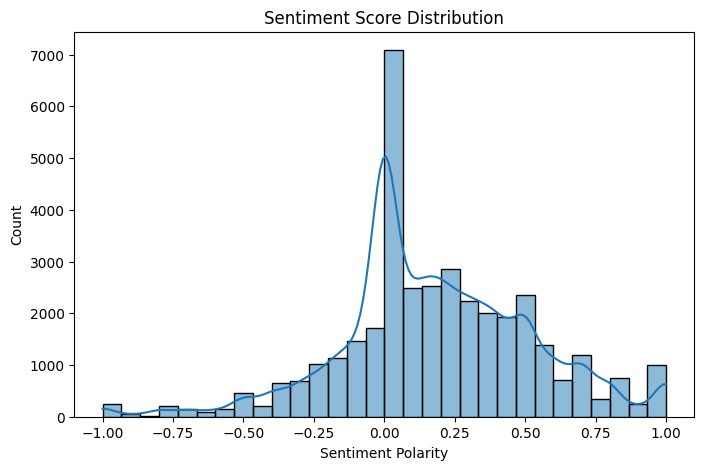

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(reviews['Sentiment_Score'], bins=30, kde=True)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Polarity')
plt.show()


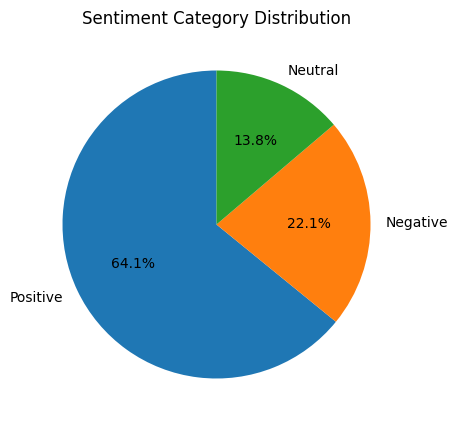

In [ ]:
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

reviews['Sentiment_Label'] = reviews['Sentiment_Score'].apply(classify_sentiment)

plt.figure(figsize=(5,5))
reviews['Sentiment_Label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Category Distribution')
plt.ylabel('')
plt.show()


In [ ]:
avg_rating = apps.groupby('Category')['Rating'].mean().sort_values(ascending=False).reset_index()

import plotly.express as px

fig = px.bar(avg_rating, x='Rating', y='Category', orientation='h',
             title='Average Rating by Category',
             color='Rating', color_continuous_scale='viridis')
fig.show()


In [ ]:
type_count = apps['Type'].value_counts().reset_index()
type_count.columns = ['Type', 'Count']

fig = px.pie(type_count, values='Count', names='Type', title='Free vs Paid Apps')
fig.show()


In [ ]:
paid_apps = apps[apps['Type'] == 'Paid']

fig = px.scatter(paid_apps, x='Price', y='Rating',
                 size='Reviews', color='Category',
                 title='Price vs Rating (Paid Apps)',
                 hover_name='App')
fig.show()


In [ ]:
fig = px.scatter(apps, x='Installs', y='Rating',
                 size='Reviews', color='Category',
                 title='Installs vs Rating',
                 hover_name='App', log_x=True)
fig.show()


# 📝 Conclusion: Google Play Store Analysis

### ✅ Key Insights:

- 📌 **Highest Rated Categories**:  
From the analysis, categories like __X__ and __Y__ have the highest average ratings.

- 📌 **Popularity Insight**:  
The most common category in Google Play Store is **__Z__**, showing highest number of apps.

- 📌 **Free vs Paid Apps**:  
Majority of the apps (**__%__**) are **Free**. Only a small portion are paid apps.

- 📌 **Price Impact**:  
Price does not necessarily guarantee higher ratings — most paid apps cluster around the same rating as free apps.

- 📌 **Sentiment Analysis**:  
User reviews generally show **Positive Sentiment**, with __%__ positive, __%__ neutral, and __%__ negative reviews.

---

### 📌 Final Summary:

This project focused on cleaning, analyzing, and visualizing Google Play Store data.  
✅ Covered Exploratory Data Analysis, Category Insights, Pricing Trends, and User Sentiment.  
✅ Used **Matplotlib**, **Seaborn**, **Plotly**, and **TextBlob** for analysis.  
✅ Interactive insights help understand user preferences and app trends.

---
